# Derivacion numérica

## Necesario saber: teorema de Taylor

Sea $f:\mathbb{R} \to \mathbb{R}$ diferenciable $k$ veces en un punto $a$. Entonces :

$$
f(x) = f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k + R_{k}(x)
$$

Y $R_{k}(x)$ cumple que

$$
\lim_{x\to a} \frac{R_{k}(x)}{(x-a)^k} = 0 \quad \left( R_k(x) \sim (x-a)^{k+1}\right)
$$

En forma aproximada, se cumple que:
$$
f(x) \approx f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k
$$



### Reescribir el teorema:

Sustitución: $x-a = h \implies x = a+h$

$$
f(a+h) = f(a) + f'(a)(h)+ \frac{f''(a)}{2!} (h)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(h)^k + R_{k}(a+h)
$$

Y $R_{k}(a+h)$ cumple que

$$
\lim_{h\to 0} \frac{R_{k}(a+h)}{h^k} = 0 \quad \left( R_k(a+h) \sim h^{k+1}\right)
$$

## ¿Cómo aproximar la derivada?

$$
f'(a) = \lim_{h\to 0 } \frac{f(a+h) - f(a)}{h}
$$

No podemos hacer limites en la computadora. ¿Qué hacemos? **Usar polinomios de taylor y despejar la derivada**:  **diferencias finitas**

### Primera aproximación: diferencia hacia adelante (forward difference)

Sea $h > 0$, $h << a$

$$
f(a+h) = f(a) + f'(a)h + R_{1}(a+h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h)-f(a)}{h} - \frac{R_{1}(a+h)}{h} \approx \frac{f(a+h)-f(a)}{h}
$$

$$
\lim_{h \to 0} \frac{R_1(a+h)}{h} = 0
$$

In [3]:
def diferenciaAdelante(f,a,h):
    return (f(a+h) - f(a))/h

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo: $f(x) = \sin{x}$, $f'(x) = \cos{x}$

Sea $a = 0$. $f(a) = 0$, $f'(a) = 1$

In [4]:
diferenciaAdelante(np.sin,0,0.1)

0.9983341664682815

In [5]:
diferenciaAdelante(np.sin,0,0.01)

0.9999833334166665

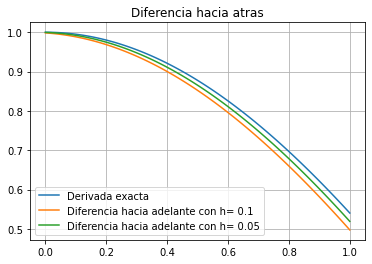

In [15]:
xs = np.linspace(0,1,100)
ys1 = [np.cos(a) for a in xs]
ys2 = [diferenciaAdelante(np.sin,a,0.1) for a in xs]
ys3 = [diferenciaAdelante(np.sin,a,0.05) for a in xs]
fig = plt.figure()
plt.plot(xs,ys1,label = "Derivada exacta")
plt.plot(xs,ys2,label="Diferencia hacia adelante con h= 0.1")
plt.plot(xs,ys3,label="Diferencia hacia adelante con h= 0.05")
plt.grid()
plt.legend()
plt.title("Diferencia hacia atras")
plt.show()

### ¿Qué otras aproximaciones hay?

## Segunda aproximación: diferencia hacia atrás (backwards difference)

Sea $h > 0$, $h << a$

$$
f(a-h) = f(a) + f'(a)(-h) + R_{1}(a-h)
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a-h)-f(a)}{-h} - \frac{R_{1}(a-h)}{-h} = \frac{f(a)-f(a-h)}{h} + \frac{R_{1}(a-h)}{h}
$$

$$
f'(a) \approx \frac{f(a)-f(a-h)}{h} 
$$

$$
\lim_{h \to 0} \frac{R_1(a-h)}{h} = 0
$$

In [11]:
def diferenciaAtras(f,a,h):
    return ( f(a) - f(a-h) ) / h

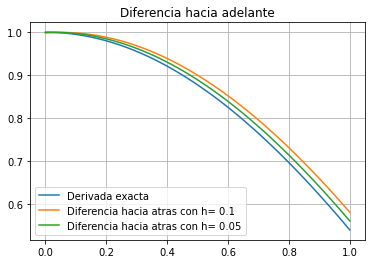

In [16]:
xs = np.linspace(0,1,100)
ys1 = [np.cos(a) for a in xs]
ys2 = [diferenciaAtras(np.sin,a,0.1) for a in xs]
ys3 = [diferenciaAtras(np.sin,a,0.05) for a in xs]
fig = plt.figure()
plt.plot(xs,ys1,label = "Derivada exacta")
plt.plot(xs,ys2,label="Diferencia hacia atras con h= 0.1")
plt.plot(xs,ys3,label="Diferencia hacia atras con h= 0.05")
plt.grid()
plt.legend()
plt.title("Diferencia hacia adelante")
plt.show()

### Tercera aproximación: diferencia centrada (central difference)

$$
f(a+h) = f(a) + f'(a) h + \frac{f''(a)}{2!} h^2 + R_2 (a+h)
$$


$$
\begin{split}
f(a-h) &= f(a) + f'(a)(- h) + \frac{f''(a)}{2!} (-h)^2 + R_2 (a-h) \\
&= f(a) - f'(a)h + \frac{f''(a)}{2!} h^2 + R_2 (a-h)
\end{split}
$$

Podemos restar ambas aproximaciones:

$$
\begin{split}
f(a+h) - f(a-h) &= (f(a) - f(a)) + (f'(a)h - (-f'(a) h)) + (\frac{f''(a)}{2!} h^2 - \frac{f''(a)}{2!} h^2) +  (R_2(a+h) - R_2(a-h)) \\
 &=  2 f'(a) h + (R_2(a+h) - R_2(a-h))
\end{split}
$$

Despejo la derivada:

$$
f'(a) = \frac{f(a+h) - f(a-h)}{2h} - \frac{R_2(a+h) - R_2(a-h)}{2h} \approx \frac{f(a+h) - f(a-h)}{2h}
$$

$$
\lim_{h \to 0} \frac{R_2(a+h) - R_2(a-h)}{2h} = 0
$$

In [17]:
def diferenciaCentral(f,a,h):
    return ( f(a+h) - f(a-h) ) / (2*h)

In [18]:
diferenciaCentral(np.sin,0,0.1)

0.9983341664682815

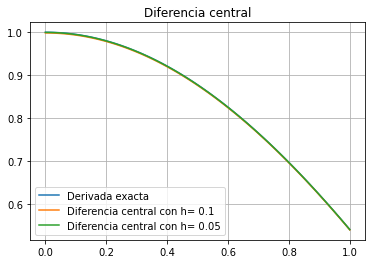

In [25]:
xs = np.linspace(0,1,100)
ys1 = [np.cos(a) for a in xs]
ys2 = [diferenciaCentral(np.sin,a,0.1) for a in xs]
ys3 = [diferenciaCentral(np.sin,a,0.05) for a in xs]
fig = plt.figure()
plt.plot(xs,ys1,label = "Derivada exacta")
plt.plot(xs,ys2,label="Diferencia central con h= 0.1")
plt.plot(xs,ys3,label="Diferencia central con h= 0.05")
plt.grid()
plt.legend()
plt.title("Diferencia central")
plt.show()

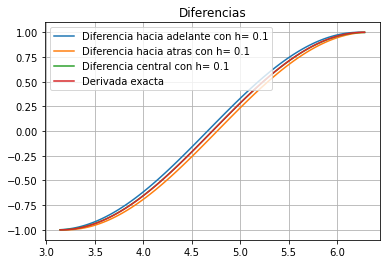

In [24]:
xs = np.linspace(np.pi,2*np.pi,100)
ys1 = [diferenciaAdelante(np.sin,a,0.1) for a in xs]
ys2 = [diferenciaAtras(np.sin,a,0.1) for a in xs]
ys3 = [diferenciaCentral(np.sin,a,0.1) for a in xs]
ys4 = [np.cos(a) for a in xs]
fig = plt.figure()
plt.plot(xs,ys1,label="Diferencia hacia adelante con h= 0.1")
plt.plot(xs,ys2,label="Diferencia hacia atras con h= 0.1")
plt.plot(xs,ys3,label="Diferencia central con h= 0.1")
plt.plot(xs,ys4,label = "Derivada exacta")
plt.grid()
plt.legend()
plt.title("Diferencias")
plt.show()

## ¿Y si quiero la fórmula de la derivada, no solo el valor numérico?

**Diferenciación automática**:: Muy difícil de programar. Usar Wolfram Mathematica